<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<H1>Birthweight regression analysis.</H1><br>

by: Fernando Patron

Machine Learning
Prof. Chase Kusterer

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<strong><h2>Introduction:</h2></strong><br>
The birth weight is that first measurement of weight that is taken at the moment the baby is born. According to several studies, it has been determined that an appropriate weight should be between 5.5 and 8.8 pounds. Any weight beyond these measurements, either lower than 5.5 or higher than 8.8 is considered out of range, and may have repercussions on the baby's health.

In this study we will analyze which are the factors that influence this measure and in what proportion they can impact either positively or negatively.


In [127]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './birthweight_low.xlsx'


# reading the file into Python
birthweight = pd.read_excel(file)


In [128]:
# getting the general info about the dataset to understand the datatypes on each feature.
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [129]:
# Getting the descriptive statistics of the dataset.
birthweight.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.000000,193.000000,196.000000,193.000000,196.000000,189.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.911917,2.341837,11.601036,39.290816,13.846561,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735
std,10.250055,2.055864,1.355136,4.267293,8.982725,2.634217,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000


In [130]:
birthweight.shape

(196, 18)

In [131]:
#How many values are in each feature. From here we can see if there are any missing values.
birthweight.count()

mage      196
meduc     193
monpre    196
npvis     193
fage      196
feduc     189
omaps     196
fmaps     196
cigs      196
drink     196
male      196
mwhte     196
mblck     196
moth      196
fwhte     196
fblck     196
foth      196
bwght     196
dtype: int64

In [132]:
for column in birthweight:
    print(f"""
Values for feature {column}:
{birthweight[column].value_counts().sort_index(ascending = True)}""")


Values for feature mage:
23     2
24     3
25     2
26     2
27     2
28     4
29    10
30     8
31     6
32     8
33    12
34     9
35     5
36     5
37     7
38    12
39     7
40     9
41     8
42    14
43     5
44     5
45     1
46     2
47     6
48     7
49     4
50     4
51     4
52     2
53     2
54     1
56     1
57     1
58     2
59     1
60     1
61     3
62     1
64     2
67     1
68     1
69     1
70     1
71     2
Name: mage, dtype: int64

Values for feature meduc:
8.0      1
10.0     4
11.0    11
12.0    56
13.0    15
14.0    28
15.0     9
16.0    51
17.0    18
Name: meduc, dtype: int64

Values for feature monpre:
1    45
2    93
3    33
4    13
5     4
6     2
7     3
8     3
Name: monpre, dtype: int64

Values for feature npvis:
2.0      1
3.0      2
5.0      3
6.0      7
7.0      7
8.0     15
9.0     12
10.0    24
11.0    15
12.0    65
13.0     9
14.0     7
15.0     9
16.0     5
17.0     2
18.0     1
19.0     1
20.0     3
25.0     1
30.0     2
31.0     1
35.0     1
Name

In [133]:
#identifing missing values on mothers education feature and trying to understand if there's a trend.
birthweight.loc[:,:][birthweight.loc[:,'meduc'].isnull()]


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
111,38,NaN,1,NaN,34,17.0,7,9,11,7,1,0,0,1,0,0,1,3610
114,43,NaN,1,9.0,36,NaN,8,9,5,8,1,0,0,1,0,0,1,3620


In [134]:
#identifing missing values on "number of prenatal visits" feature and trying to understand if there's a trend.
birthweight.loc[:,:][birthweight.loc[:,'npvis'].isnull()]


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
73,47,15.0,2,NaN,39,17.0,9,9,19,7,1,0,0,1,0,0,1,3170
111,38,NaN,1,NaN,34,17.0,7,9,11,7,1,0,0,1,0,0,1,3610
185,38,12.0,2,NaN,32,14.0,9,9,13,0,1,0,1,0,0,1,0,4210


In [135]:
#identifing missing values on fathers education feature and trying to understand if there's a trend.
birthweight.loc[:,:][birthweight.loc[:,'feduc'].isnull()]

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
74,42,13.0,7,11.0,26,NaN,9,9,2,4,1,0,1,0,1,0,0,3170
99,51,17.0,6,8.0,38,NaN,8,9,17,6,0,0,1,0,0,0,1,3459
114,43,NaN,1,9.0,36,NaN,8,9,5,8,1,0,0,1,0,0,1,3620
153,37,12.0,8,5.0,40,NaN,7,9,4,0,1,0,1,0,0,0,1,3799
164,36,12.0,3,6.0,31,NaN,7,9,16,2,0,0,1,0,0,0,1,3900
191,30,12.0,5,12.0,38,NaN,5,7,3,2,1,0,1,0,0,0,1,4610


In [136]:
# Identifing the total number of missing values.
birthweight.isnull().sum(axis=0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

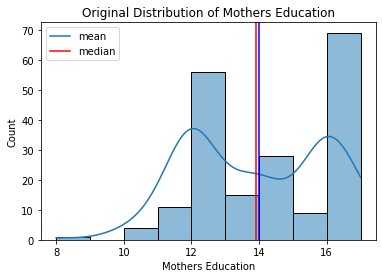

In [137]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'meduc',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Mothers Education")
plt.xlabel(xlabel = "Mothers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")
plt.axvline(x = birthweight['meduc'].mean(),
            color = 'red')
plt.axvline(x = birthweight['meduc'].median(),
            color = 'blue')
plt.legend(labels =  ['mean', 'median'])
# displaying the histogram
plt.show()

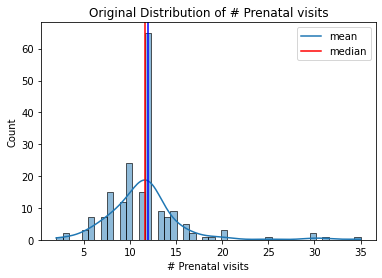

In [138]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'npvis',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of # Prenatal visits")
plt.xlabel(xlabel = "# Prenatal visits") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")
plt.axvline(x = birthweight['npvis'].mean(),
            color = 'red')
plt.axvline(x = birthweight['npvis'].median(),
            color = 'blue')
plt.legend(labels =  ['mean', 'median'])
# displaying the histogram
plt.show()

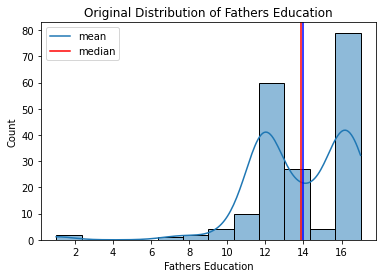

In [139]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'feduc',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Fathers Education")
plt.xlabel(xlabel = "Fathers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")
plt.axvline(x = birthweight['feduc'].mean(),
            color = 'red')
plt.axvline(x = birthweight['feduc'].median(),
            color = 'blue')
plt.legend(labels =  ['mean', 'median'])

# displaying the histogram
plt.show()

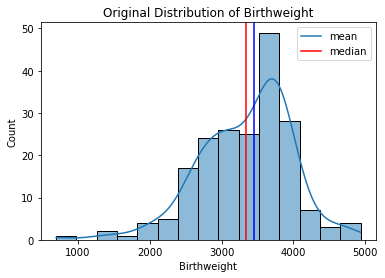

In [140]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")
plt.axvline(x = birthweight['bwght'].mean(),
            color = 'red')
plt.axvline(x = birthweight['bwght'].median(),
            color = 'blue')
plt.legend(labels =  ['mean', 'median'])
# displaying the histogram
plt.show()

In [141]:
birthweight.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.000000,193.000000,196.000000,193.000000,196.000000,189.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.911917,2.341837,11.601036,39.290816,13.846561,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735
std,10.250055,2.055864,1.355136,4.267293,8.982725,2.634217,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000


After reviewing and identifying the missing values on the features, I decided to fill the missing values the following way:
- meduc --> Use the mode as the criteria.
- feduc --> Use the mode as the criteria.
- npvis --> Use mean as the criteria to fill the missing values.

In [142]:
#Filling missing values using the mode for mothers education

meduc_mode = birthweight['meduc'].mode()[0]

#filling meduc with mode

birthweight['meduc'].fillna(value = meduc_mode,
                     inplace = True)

#checking to see if any null left

print(birthweight['meduc'].isnull().any())

#Filling missing values using the mode for fathers education

meduc_mode = birthweight['feduc'].mode()[0]

#filling meduc with mode

birthweight['feduc'].fillna(value = meduc_mode,
                     inplace = True)

#checking to see if any null left

print(birthweight['meduc'].isnull().any())

#Filling missing values using the mean for npvis

npvis_mean = birthweight['npvis'].mean()

#filling npvis with mean

birthweight['npvis'].fillna(value = npvis_mean,
                     inplace = True)

#checking to see if any null left

print(birthweight['npvis'].isnull().any())

False
False
False


In [143]:
# Verifying if there's any missing values left.
birthweight.isnull().sum(axis=0)

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

Once the data has been cleaned and adjusted for use, then we can move on to creating the model and begin our analysis.

In [145]:
#Printing the features with "" for easier use in correlation code.
for column in birthweight:
    print("'"+ column + "'", end = " , ")

'mage' , 'meduc' , 'monpre' , 'npvis' , 'fage' , 'feduc' , 'omaps' , 'fmaps' , 'cigs' , 'drink' , 'male' , 'mwhte' , 'mblck' , 'moth' , 'fwhte' , 'fblck' , 'foth' , 'bwght' , 

In [150]:
# creating a list of continuous features (including bwght)
continuous_data = ['mage' , 'meduc' , 'monpre' , 'npvis' , 
                   'fage' , 'feduc' , 'omaps' , 'fmaps' , 'cigs' , 'drink' , 'male' , 'mwhte' , 'mblck' , 'moth' , 'fwhte' , 'fblck' , 'foth' , 'bwght' ]


# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with bwght
birthweight_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght     1.00
omaps     0.25
fmaps     0.25
feduc     0.13
mblck     0.13
fblck     0.12
meduc     0.11
male      0.11
npvis     0.06
moth     -0.02
fwhte    -0.04
monpre   -0.05
foth     -0.08
mwhte    -0.11
fage     -0.40
mage     -0.46
cigs     -0.57
drink    -0.74
Name: bwght, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<strong><h2>Building A Base Model</h2><strong><br>

In [151]:
#Printing the features with "+" for easier use in OLS regression code.
for column in birthweight:
    print(""+ column + "", end = " + ")

mage + meduc + monpre + npvis + fage + feduc + omaps + fmaps + cigs + drink + male + mwhte + mblck + moth + fwhte + fblck + foth + bwght + 

<strong>The following cells will be different tests with different variables in order to determine which combination gives us the most relevant values in order to conclude our analysis.
As we progress in the regressions, we can eliminate those variables that give us values out of range and that indicate that they have a very low correlation with our dependent variable, in this case "Birthweight"</strong>

In [152]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage + meduc + monpre + npvis + 
                            fage + feduc + omaps + fmaps + cigs + drink + 
                            male + mwhte + mblck + moth + fwhte + fblck + 
                            foth""", data = birthweight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     31.12
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           4.36e-42
Time:                        18:04:31   Log-Likelihood:                -1420.7
No. Observations:                 196   AIC:                             2873.
Df Residuals:                     180   BIC:                             2926.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2313.2059    294.653      7.851      0.0

In [153]:
# removing 'omaps' and 'fmaps' from the regression because this variables won't 
# impact the birthweight since both are measured after birth.

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage + meduc + monpre + npvis + 
                            fage + feduc + cigs + drink + male + mwhte + 
                            mblck + moth + fwhte + fblck + foth""", data = birthweight)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     35.51
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           4.98e-43
Time:                        18:04:35   Log-Likelihood:                -1422.3
No. Observations:                 196   AIC:                             2873.
Df Residuals:                     182   BIC:                             2919.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2709.3122    176.485     15.352      0.0

After running the first couple of regressions, I decided to run a histogram on all the variables to identify the skewness of each one of them and then decide to to a log on those skewed.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br><h3>Histograms</h3>

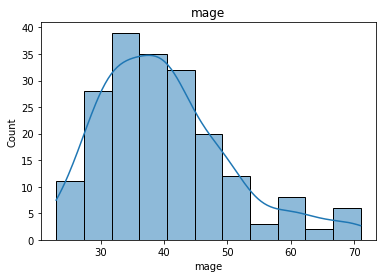

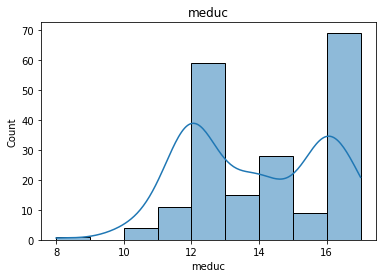

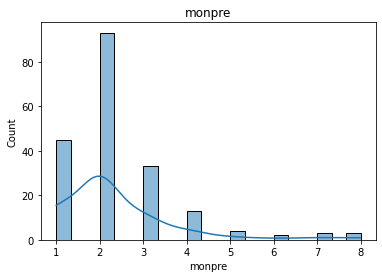

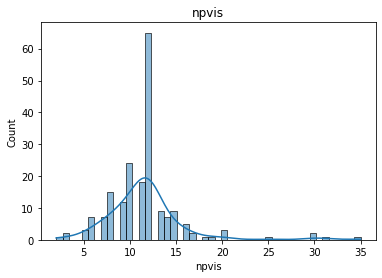

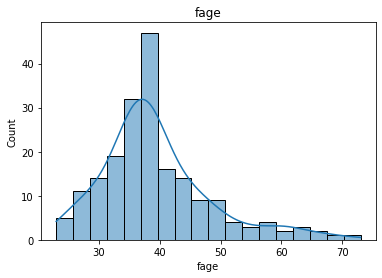

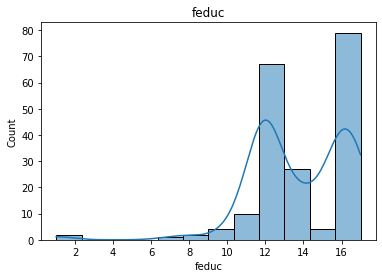

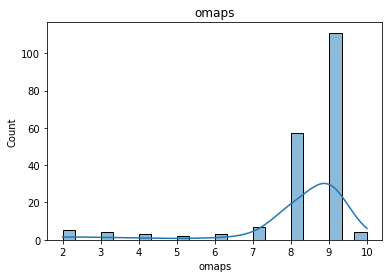

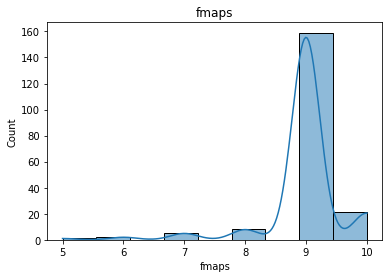

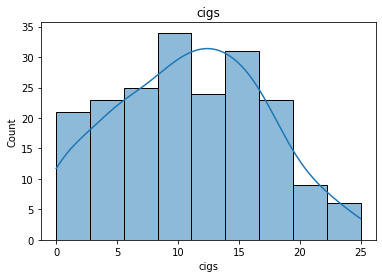

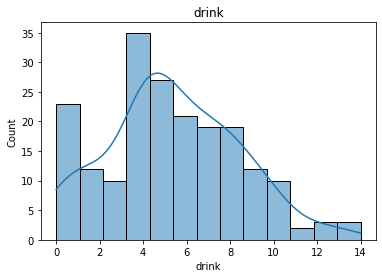

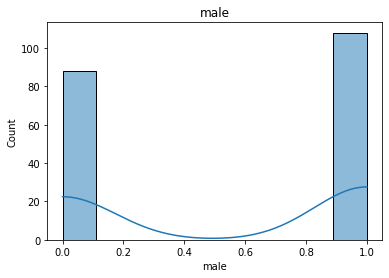

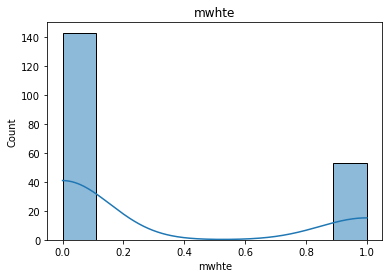

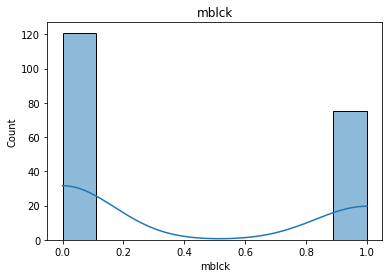

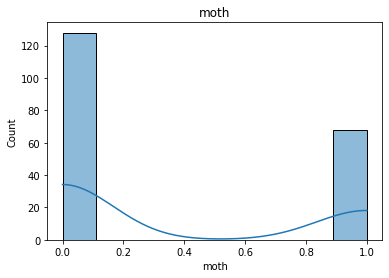

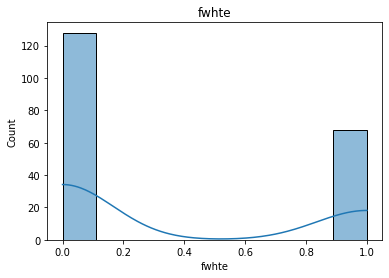

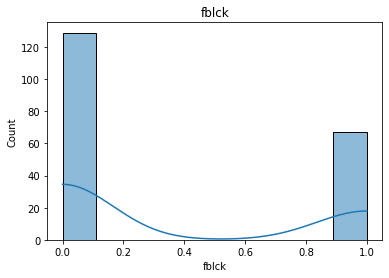

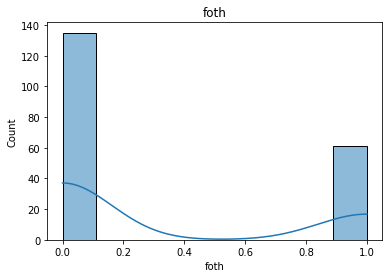

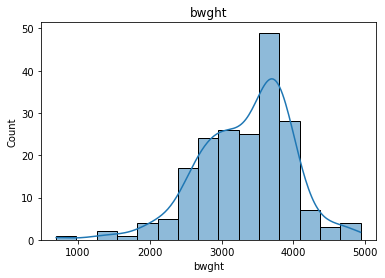

In [154]:
# developing a histogram using HISTPLOT
for feature in birthweight:
    sns.histplot(data   = birthweight,
             x      = feature,
             kde    = True)


    # title and axis labels
    plt.title(label   = feature)
    plt.xlabel(xlabel = feature) # avoiding using dataset labels
    plt.ylabel(ylabel = "Count")

    # displaying the histogram
    plt.show()

In [155]:
# after analyzing the histplot above, I decided to do the log on the explanatory variables that seemed skewed.
# log transforming skewed variables and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])
birthweight['log_mage'] = np.log(birthweight['mage'])
birthweight['log_fage'] = np.log(birthweight['fage'])
birthweight['log_meduc'] = np.log(birthweight['meduc'])
birthweight['log_npvis'] = np.log(birthweight['npvis'])
birthweight['log_feduc'] = np.log(birthweight['feduc'])
birthweight['log_omaps'] = np.log(birthweight['omaps'])
birthweight['log_monpre'] = np.log(birthweight['monpre'])

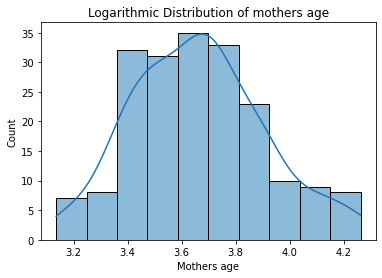

In [156]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_mage',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of mothers age")
plt.xlabel(xlabel = "Mothers age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

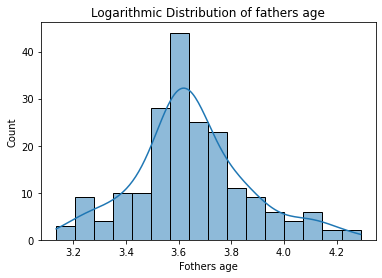

In [157]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_fage',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of fathers age")
plt.xlabel(xlabel = "Fothers age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

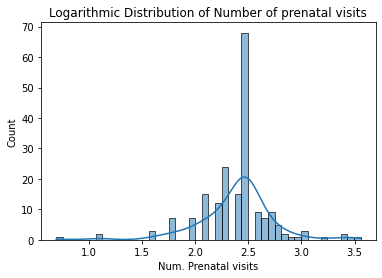

In [158]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_npvis',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Number of prenatal visits")
plt.xlabel(xlabel = "Num. Prenatal visits") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

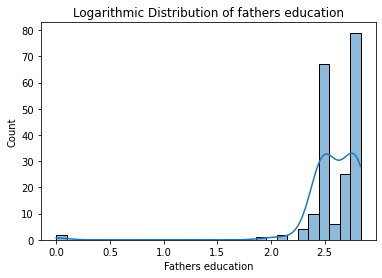

In [159]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_feduc',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of fathers education")
plt.xlabel(xlabel = "Fathers education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

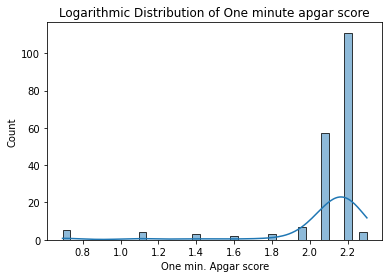

In [160]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_omaps',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of One minute apgar score")
plt.xlabel(xlabel = "One min. Apgar score") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

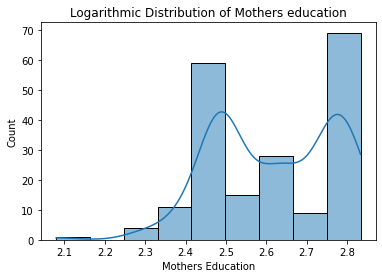

In [161]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_meduc',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mothers education")
plt.xlabel(xlabel = "Mothers Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

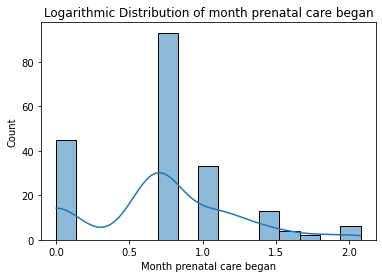

In [162]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_monpre',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of month prenatal care began")
plt.xlabel(xlabel = "Month prenatal care began") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [163]:
# Rerunning the OLS regression model but now with the log variables of mage and fage

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ log_mage + meduc + monpre + npvis + 
                            log_fage + feduc + cigs + drink + male + mwhte + 
                            mblck + moth + fwhte + fblck + foth""", data = birthweight)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     34.03
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           7.37e-42
Time:                        18:04:45   Log-Likelihood:                -1425.3
No. Observations:                 196   AIC:                             2879.
Df Residuals:                     182   BIC:                             2924.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3696.2639    343.781     10.752      0.0

In [164]:
# The model with the logaritmic variables didn't improve. 
# Running again the previous model 

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage + meduc + monpre + npvis + 
                            fage + feduc + cigs + drink + male + mwhte + 
                            mblck + moth + fwhte + fblck + foth""", data = birthweight)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     35.51
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           4.98e-43
Time:                        18:04:47   Log-Likelihood:                -1422.3
No. Observations:                 196   AIC:                             2873.
Df Residuals:                     182   BIC:                             2919.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2709.3122    176.485     15.352      0.0

In [86]:
# Running the model without variable 'male' because of it's high P-value on 
# the previous regression 
# Running again the previous model 

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage + meduc + monpre + npvis + 
                            fage + feduc + cigs + drink + mwhte + 
                            mblck + moth + fwhte + fblck + foth""", data = birthweight)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     38.65
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           8.19e-44
Time:                        10:42:27   Log-Likelihood:                -1422.4
No. Observations:                 196   AIC:                             2871.
Df Residuals:                     183   BIC:                             2913.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2717.5292    174.044     15.614      0.0

In [88]:
# Running the previous model changing the variable 'feduc' for it's logarithmic 
# version "log_feduc"
# Running again the previous model 

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage + meduc + monpre + npvis + 
                            fage + log_feduc + cigs + drink + mwhte + 
                            mblck + moth + fwhte + fblck + foth""", data = birthweight)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     38.92
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           5.26e-44
Time:                        10:43:55   Log-Likelihood:                -1421.9
No. Observations:                 196   AIC:                             2870.
Df Residuals:                     183   BIC:                             2912.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2588.9925    214.757     12.055      0.0

In [89]:
# Running the previous model changing the variable 'npvis' for it's logarithmic 
# version "log_npvis" because of it's high P-value on the previous model.
# Running again the previous model 

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage + meduc + monpre + log_npvis + 
                            fage + log_feduc + cigs + drink + mwhte + 
                            mblck + moth + fwhte + fblck + foth""", data = birthweight)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     39.51
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.99e-44
Time:                        10:46:23   Log-Likelihood:                -1420.8
No. Observations:                 196   AIC:                             2868.
Df Residuals:                     183   BIC:                             2910.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2394.6401    252.804      9.472      0.0

In [93]:
# Running the previous model changing the variable 'monpre' for it's logarithmic 
# version "log_monpre" because of it's high P-value on the previous model.
# Running again the previous model 

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage + meduc + log_monpre + log_npvis + 
                            fage + log_feduc + cigs + drink + mwhte + 
                            mblck + moth + fwhte + fblck + foth""", data = birthweight)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     39.62
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.65e-44
Time:                        10:51:18   Log-Likelihood:                -1420.6
No. Observations:                 196   AIC:                             2867.
Df Residuals:                     183   BIC:                             2910.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2387.4151    240.511      9.926      0.0

In [94]:
# Running the previous model changing the variable 'meduc' for it's logarithmic 
# version "log_meduc" because of it's high P-value on the previous model.
# Running again the previous model 

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage + meduc + log_monpre + log_npvis + 
                            fage + log_feduc + cigs + drink + mwhte + 
                            mblck + moth + fwhte + fblck + foth""", data = birthweight)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     39.57
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.80e-44
Time:                        10:54:28   Log-Likelihood:                -1420.7
No. Observations:                 196   AIC:                             2867.
Df Residuals:                     183   BIC:                             2910.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2165.9799    347.871      6.226      0.0

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Correlation Matrix</h3><br>

In [1]:
#Printing the features with "" for easier use in correlation code.
for column in birthweight:
    print("'"+ column + "'", end = " , ")

NameError: name 'birthweight' is not defined

In [110]:
#Checking again the correlation of the valiables with 'bwght' after running
# multiple regression models.
# developing a small correlation matrix
birthweight_corr = birthweight.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
birthweight_corr.loc['log_bwght',                   # Y-variable
                    ['mage' , 'meduc' , 'monpre' , 'npvis' , 'fage' , 'feduc' 
                     , 'omaps' , 'fmaps' , 'cigs' , 'drink' , 'male' , 'mwhte' 
                     , 'mblck' , 'moth' , 'fwhte' , 'fblck' , 'foth' , 'bwght' 
                     , 'log_mage' , 'log_fage' , 'log_npvis' , 'log_feduc' 
                     , 'log_omaps' , 'log_meduc' , 'log_monpre']].sort_values(ascending = False)

bwght         0.968535
fmaps         0.323047
log_omaps     0.316380
omaps         0.314084
log_npvis     0.236606
log_feduc     0.165357
feduc         0.145375
meduc         0.121933
log_meduc     0.117448
npvis         0.110433
mblck         0.094034
fblck         0.085382
male          0.083087
moth          0.004723
fwhte        -0.041637
foth         -0.044665
monpre       -0.090408
log_monpre   -0.094039
mwhte        -0.107958
log_fage     -0.389008
fage         -0.410147
log_mage     -0.438880
mage         -0.495450
cigs         -0.547565
drink        -0.695264
Name: log_bwght, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Final Model</h3><br>

In [119]:
# Running a new model without duplicating variables with their log version. 

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage + cigs + drink""", data = birthweight)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     152.7
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.31e-50
Time:                        16:32:43   Log-Likelihood:                -1426.6
No. Observations:                 196   AIC:                             2861.
Df Residuals:                     192   BIC:                             2874.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4928.7856    106.672     46.205      0.0

In [120]:
#building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """ bwght ~ mage + cigs + drink""",
data = birthweight)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     152.7
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.31e-50
Time:                        16:33:43   Log-Likelihood:                -1426.6
No. Observations:                 196   AIC:                             2861.
Df Residuals:                     192   BIC:                             2874.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4928.7856    106.672     46.205      0.000    4718.385    5139.186
mage         -14.0488      2.632     -5.338      0.000     -19.240      -8.858
cigs         -36.0934      4.455     -8.103      0.000     -44.879     -27.307
drink       -117.8497      9.480    -12.431      0.000    -136.549     -99.151
==============================================================================
Omnibus:                        5.060   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                6.361
Skew:                          -0.145   Prob(JB):                       0.0416
Kurtosis:                       3.834   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<strong>Finally, after several regressions, we can conclude that the explanatory variables that have the greatest impact and most correlation with our dependent variable are "Mother's age", "Smoker or not", and "drinks".
These three variables gave us very representative values in our model and with this we can determine that they are statistically significant for our analysis.</strong>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h1>Training and testing the model</h1><br>
Once identified the best model and decided which explanatory variables to use,
it's time to create the training and testing of our model.

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<strong><h2> OLS Model </h2><strong>

In [271]:
#preparing explanatory variable data ## dropping missing value flag columns
#Dropping the variables that don't improve our model.
birthweight_data = birthweight.drop([ 'monpre' , 'npvis' , 'feduc' 
                                     , 'omaps' , 'fmaps' , 'mwhte' 
                                     , 'mblck' , 'moth' , 'fwhte' , 'fblck' 
                                     , 'bwght', 'log_bwght', 'log_mage', 'log_fage'
                                     ,'log_meduc','log_npvis','log_feduc',
                                     'log_omaps','log_monpre'], axis = 1)

#preparing response variables
birthweight_target = birthweight.loc[ : , "bwght"]


#preparing traing and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
                                    birthweight_data, 
                                    birthweight_target, 
                                    test_size = 0.25, 
                                    random_state = 219)

#checking the shapes of the data sets

print(f"""
Training Data
-------------
X-side: {x_train.shape}
Y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
Y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 7)
Y-side: (147,)


Testing Data
------------
X-side: (49, 7)
Y-side: (49,)



In [272]:
# declaring set of x-variables
x_variables = ['mage','cigs','drink']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

mage +
cigs +
drink +


In [273]:
# merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """bwght ~ mage +
                                        cigs +
                                        drink""",
                                data = birthweight_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     118.1
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.59e-38
Time:                        13:11:11   Log-Likelihood:                -1073.0
No. Observations:                 147   AIC:                             2154.
Df Residuals:                     143   BIC:                             2166.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5077.0249    124.196     40.879      0.0

In [274]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birthweight.loc[: , x_variables]


# preparing response variable
birthweight_target = birthweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [267]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7125
OLS Testing Score  : 0.6444
OLS Train-Test Gap : 0.0681


In [275]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 5077.02)
('mage', -17.82)
('cigs', -38.1)
('drink', -109.26)


<strong><h2> Lasso Model </h2><strong>

In [231]:
import sklearn.linear_model # linear models

In [261]:
#preparing explanatory variable data ## dropping missing value flag columns
#Dropping the variables that don't improve our model.
birthweight_data = birthweight.drop([ 'mage', 'monpre' , 'npvis' , 'feduc' 
                                     , 'omaps' , 'fmaps' , 'mwhte' 
                                     , 'mblck' , 'moth' , 'fwhte' , 'fblck' 
                                     , 'bwght', 'log_bwght', 'log_mage', 'log_fage'
                                     ,'log_meduc','log_npvis','log_feduc',
                                     'log_omaps','log_monpre'], axis = 1)

#preparing response variables
birthweight_target = birthweight.loc[ : , "bwght"]


#preparing traing and testing sets 
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
                                    birthweight_data, 
                                    birthweight_target, 
                                    test_size = 0.25, 
                                    random_state = 219)

#checking the shapes of the data sets

print(f"""
Training Data
-------------
X-side: {x_train.shape}
Y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
Y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 7)
Y-side: (147,)


Testing Data
------------
X-side: (49, 7)
Y-side: (49,)



In [262]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6879
Lasso Testing Score  : 0.7056
Lasso Train-Test Gap : 0.0177


In [263]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4432.05)
('meduc', 29.73)
('fage', -12.54)
('cigs', -37.39)
('drink', -113.79)
('male', 46.4)
('foth', -8.31)


<strong><h2> ARD Model </h2><strong>

In [264]:
#preparing explanatory variable data ## dropping missing value flag columns
#Dropping the variables that don't improve our model.
birthweight_data = birthweight.drop([ 'mage','monpre' , 'npvis' , 'feduc' 
                                     , 'omaps' , 'fmaps' , 'mwhte' 
                                     , 'mblck' , 'moth' , 'fwhte' , 'fblck' 
                                     , 'bwght', 'log_bwght', 'log_mage', 'log_fage'
                                     ,'log_meduc','log_npvis','log_feduc',
                                     'log_omaps','log_monpre'], axis = 1)

#preparing response variables
birthweight_target = birthweight.loc[ : , "bwght"]


#preparing traing and testing sets 
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
                                    birthweight_data, 
                                    birthweight_target, 
                                    test_size = 0.25, 
                                    random_state = 219)

#checking the shapes of the data sets

print(f"""
Training Data
-------------
X-side: {x_train.shape}
Y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
Y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 7)
Y-side: (147,)


Testing Data
------------
X-side: (49, 7)
Y-side: (49,)



In [257]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(alpha_1 = 1e-06,
                                         normalize = True) ##this alpha set is the default


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6862
Testing Score : 0.7177
ARD Train-Test Gap : 0.0315


In [258]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4524.19)
('meduc', 27.12213)
('fage', -12.80115)
('cigs', -38.43376)
('drink', -117.01349)
('male', 7.11708)
('foth', -0.0001)


In [259]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4524.19)
('meduc', 27.12213)
('fage', -12.80115)
('cigs', -38.43376)
('drink', -117.01349)
('male', 7.11708)
('foth', -0.0001)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h1>Comparing Models</h1><br>
After defining all the models, OLS, Lasso & ARD, we compare them and decide which one is the correct to use
according to the train score, test score and gap.

In [276]:
# comparing results


print(f"""
Model                       Train Score          Test Score          Train-Test Gap
-----                       -----------          ----------          --------------
OLS                           {lr_train_score}              {lr_test_score}             {lr_test_gap}
Lasso                         {lasso_train_score}              {lasso_test_score}             {lasso_test_gap}
ARD (Final Model)             {ard_train_score.round(decimals=4)}              {ard_test_score.round(decimals=4)}             {ard_test_gap} 
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./linear_model_performance.xlsx',
                           index = False)


Model                       Train Score          Test Score          Train-Test Gap
-----                       -----------          ----------          --------------
OLS                           0.7125              0.6444             0.0681
Lasso                         0.6879              0.7056             0.0177
ARD (Final Model)             0.6862              0.7177             0.0315 



In [277]:
# The following code will generate an Excel file that outputs the original sale 
# prices, the predictions for each model, and the deviations on each prediction.
prediction_results = pd.DataFrame(data = {
    'Original Sale Prices' : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })


prediction_results.to_excel(excel_writer = './linear_model_predictions.xlsx',
                            index = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h1>Conclusion</h1><br>

After having carried out the analysis with each and every one of the variables in their original and logarithmic format, and after having tested the model with the different methods, we can conclude that for a baby to have an adequate birth weight, it is key that the mother is the optimal age at the time of pregnancy since if she becomes pregnant at a very advanced age than recommended, then it could affect the weight of the newborn. Likewise, if the mother is a smoker and decides to smoke during her pregnancy, this could have consequences directly related to the baby's weight. It may sound obvious but smoking during pregnancy is truly harmful for the baby and not only in her birth weight but in many other aspects.
According to the U.S. Department of Health and Human Services, "One in every five babies born to mothers who smoke during pregnancy has low birth weight. Mothers who are exposed to secondhand smoke while pregnant are more likely to have lower birth weight babies. Babies born too small or too early are not as healthy."*
Additionally, drinking during pregnancy also has negative consequences on the weight and development of the baby. Although some articles mention that it is advisable to have a daily glass of wine during pregnancy, it is recommended to put these types of drinks aside and replace them with something else, perhaps a glass of juice, a coffee, a tea or a refreshing glass of water. What is important is to have a good degree of hydration in order to have a healthy baby boy or girl.

Reference:<br>
*CDC, https://www.cdc.gov/tobacco/basic_information/health_effects/pregnancy/index.htm